<a href="https://colab.research.google.com/github/fahmidhap/MAIN-PROJECTS/blob/master/Copy_of_animal_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'animals-detection-images-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1316317%2F2197760%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240227%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240227T123514Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D69e4f67b836111367b3b2f20832dc943907ce6e7511fecea1e13082c435dd40c9f322d3e6ed9689f4a58761e522208841c02cb32ec9660cec6927df33c6e40c7fb21ea6230205e0262377ca09c9bf7761cd99b567a8c98ce34b650befbfc691edc12cefba39c5989f4de31da148158fe3b18097ba57ce56721b225485b2881322ee486a8263822f83e00dcea5d2ac58566e05e9511de6f58bbb0cf2273c73fb026de21479e3c9b6f43d5412deaf7993cf9c003f2e6a8c41333b7662fc755b4ff9c62b06b8ce7280d46d65db83a08b90fe770a878705be5888d8cdaceffa332946626347eb167f6ea06554febdde5ca431301b180c70e4f7c5bb976afcc1250a9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9575388685 bytes downloaded
Downloaded and uncompressed: animals-detection-images-dataset
Data source import complete.


In [ ]:
##import libraries
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

*loading the dataset*

In [ ]:
train_dir= '../input/animals-detection-images-dataset/train'
test_dir='../input/animals-detection-images-dataset/test'

**some Basic EDA**

Lion sample size :  208 

Camel sample size :  67 

Cheetah sample size :  132 

Crocodile sample size :  108 

Deer sample size :  327 

Elephant sample size :  155 

Fox sample size :  148 

Giraffe sample size :  298 

Jaguar sample size :  100 

Leopard sample size :  123 

Tiger sample size :  313 

Zebra sample size :  181 

training data size : 2160


<BarContainer object of 12 artists>

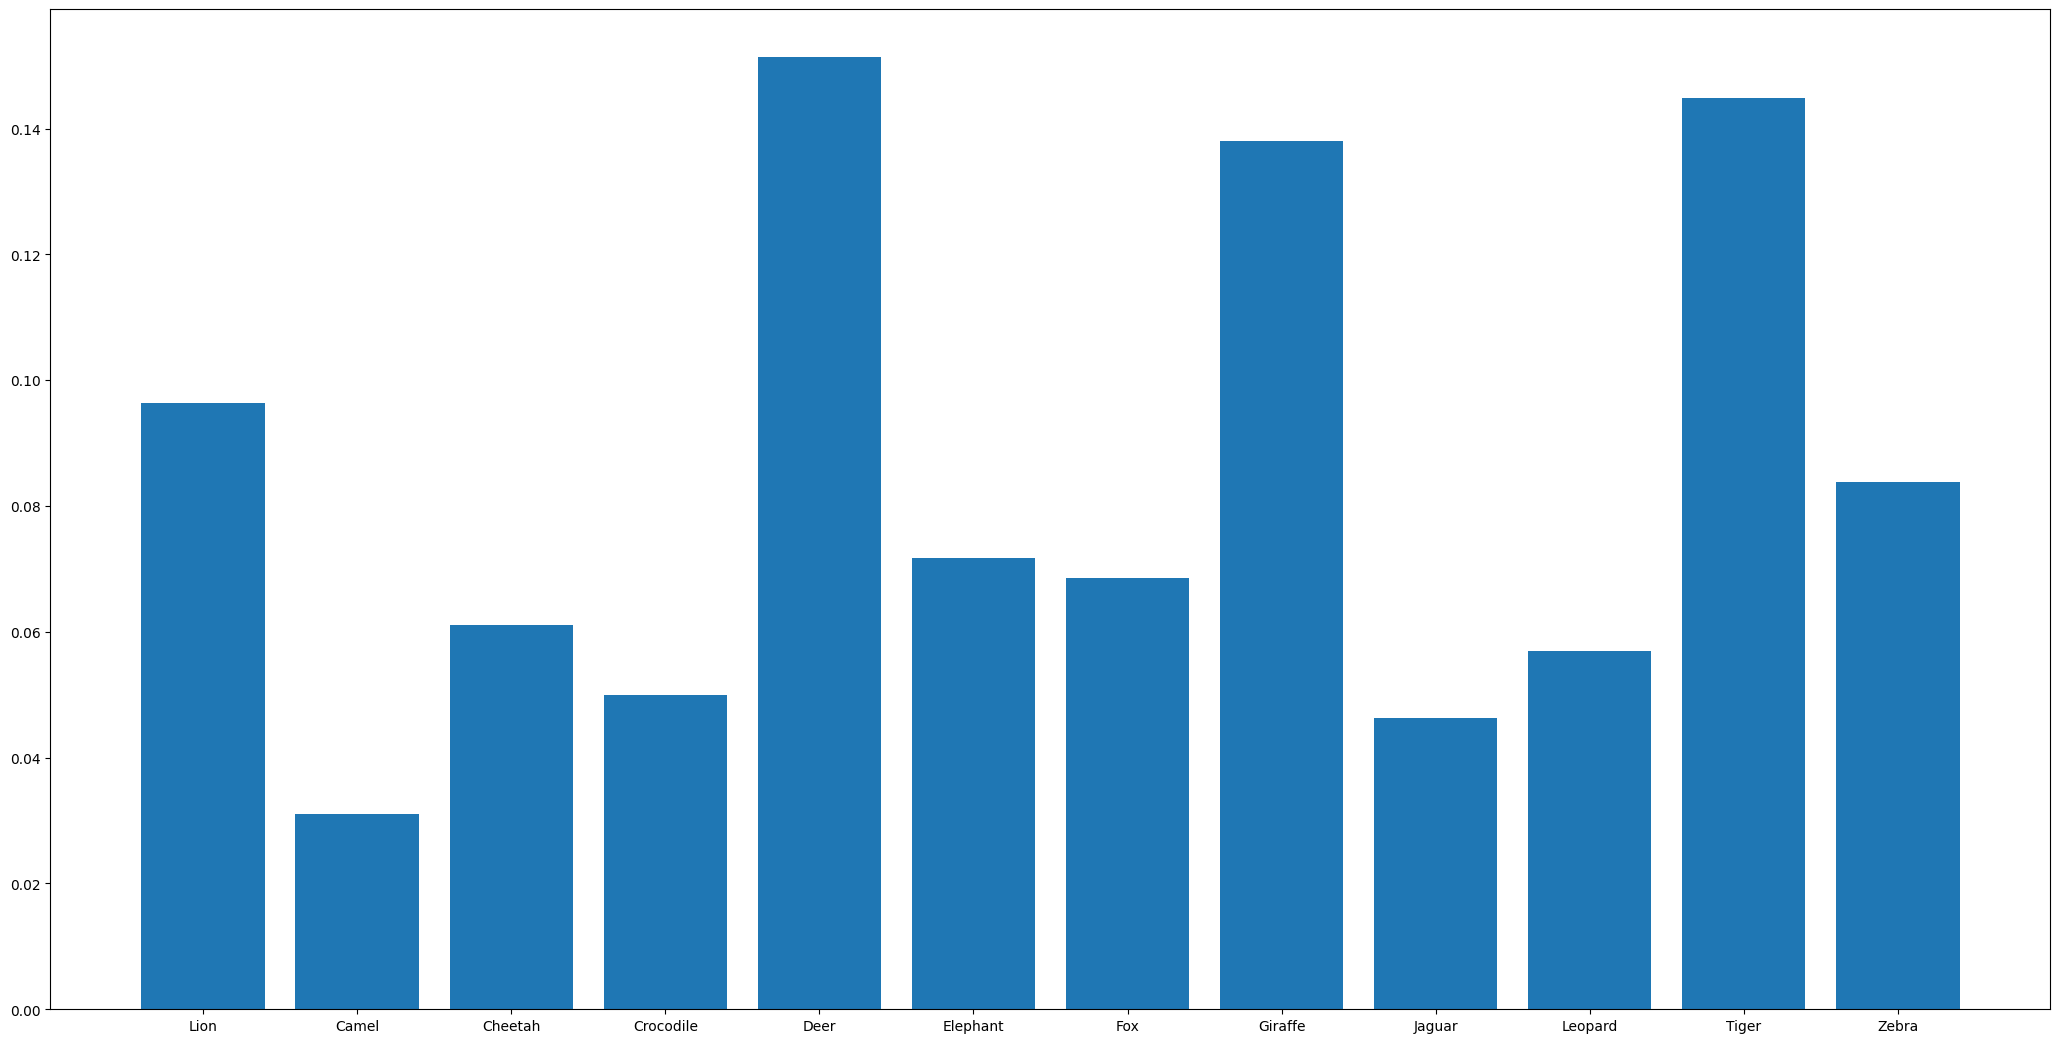

In [ ]:
##CALCULATING TOTAL NO OF IMAGES
training_images_files_names_Lion = len(os.listdir("../input/animals-detection-images-dataset/train/Lion"))-1
training_images_files_names_Camel = len(os.listdir("../input/animals-detection-images-dataset/train/Camel"))-1
training_images_files_names_Cheetah = len(os.listdir("../input/animals-detection-images-dataset/train/Cheetah"))-1
training_images_files_names_Crocodile = len(os.listdir("../input/animals-detection-images-dataset/train/Crocodile"))-1
training_images_files_names_Deer = len(os.listdir("../input/animals-detection-images-dataset/train/Deer"))-1
training_images_files_names_Elephant = len(os.listdir("../input/animals-detection-images-dataset/train/Elephant"))-1
training_images_files_names_Fox = len(os.listdir("../input/animals-detection-images-dataset/train/Fox"))-1
training_images_files_names_Giraffe = len(os.listdir("../input/animals-detection-images-dataset/train/Giraffe"))-1
training_images_files_names_Jaguar = len(os.listdir("../input/animals-detection-images-dataset/train/Jaguar"))-1
training_images_files_names_Leopard = len(os.listdir("../input/animals-detection-images-dataset/train/Leopard"))-1
training_images_files_names_Tiger = len(os.listdir("../input/animals-detection-images-dataset/train/Tiger"))-1
training_images_files_names_Zebra = len(os.listdir("../input/animals-detection-images-dataset/train/Zebra"))-1
print("Lion sample size : ",training_images_files_names_Lion,"\n")
print("Camel sample size : ",training_images_files_names_Camel,"\n")
print("Cheetah sample size : ",training_images_files_names_Cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_Crocodile,"\n")
print("Deer sample size : ",training_images_files_names_Deer,"\n")
print("Elephant sample size : ",training_images_files_names_Elephant,"\n")
print("Fox sample size : ",training_images_files_names_Fox,"\n")
print("Giraffe sample size : ",training_images_files_names_Giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_Jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_Leopard,"\n")
print("Tiger sample size : ",training_images_files_names_Tiger,"\n")
print("Zebra sample size : ",training_images_files_names_Zebra,"\n")
training_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"],occurences)


Lion sample size :  100 

Camel sample size :  27 

Cheetah sample size :  35 

Crocodile sample size :  76 

Deer sample size :  177 

Elephant sample size :  33 

Fox sample size :  69 

Giraffe sample size :  23 

Jaguar sample size :  38 

Leopard sample size :  57 

Tiger sample size :  26 

Zebra sample size :  31 

validation data size: 2160


<BarContainer object of 12 artists>

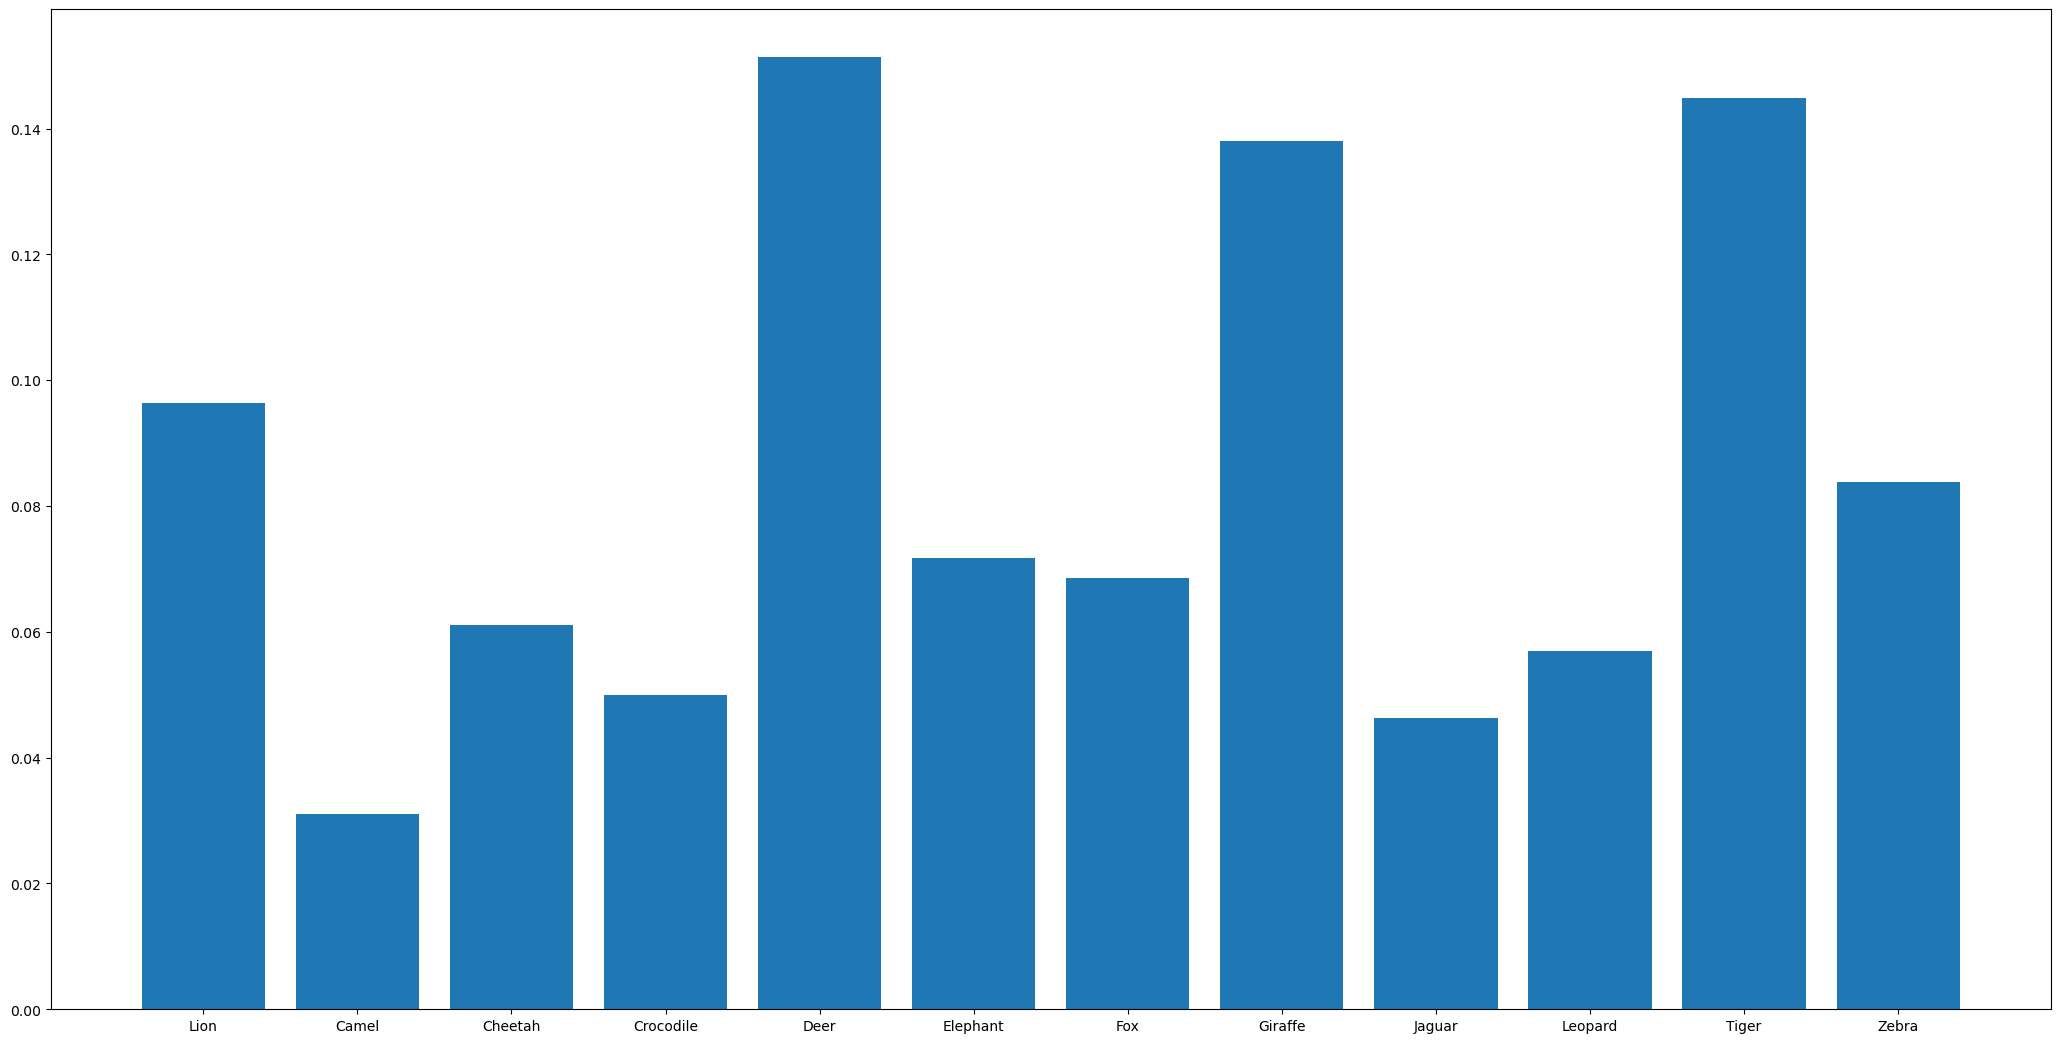

In [ ]:
training_images_files_names_lion = len(os.listdir("../input/animals-detection-images-dataset/test/Lion"))-1
training_images_files_names_camel = len(os.listdir("../input/animals-detection-images-dataset/test/Camel"))-1
training_images_files_names_cheetah = len(os.listdir("../input/animals-detection-images-dataset/test/Cheetah"))-1
training_images_files_names_crocodile = len(os.listdir("../input/animals-detection-images-dataset/test/Crocodile"))-1
training_images_files_names_deer = len(os.listdir("../input/animals-detection-images-dataset/test/Deer"))-1
training_images_files_names_elephant = len(os.listdir("../input/animals-detection-images-dataset/test/Elephant"))-1
training_images_files_names_fox = len(os.listdir("../input/animals-detection-images-dataset/test/Fox"))-1
training_images_files_names_giraffe = len(os.listdir("../input/animals-detection-images-dataset/test/Giraffe"))-1
training_images_files_names_jaguar = len(os.listdir("../input/animals-detection-images-dataset/test/Jaguar"))-1
training_images_files_names_leopard = len(os.listdir("../input/animals-detection-images-dataset/test/Leopard"))-1
training_images_files_names_tiger = len(os.listdir("../input/animals-detection-images-dataset/test/Tiger"))-1
training_images_files_names_zebra = len(os.listdir("../input/animals-detection-images-dataset/test/Zebra"))-1
print("Lion sample size : ",training_images_files_names_lion,"\n")
print("Camel sample size : ",training_images_files_names_camel,"\n")
print("Cheetah sample size : ",training_images_files_names_cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_crocodile,"\n")
print("Deer sample size : ",training_images_files_names_deer,"\n")
print("Elephant sample size : ",training_images_files_names_elephant,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Giraffe sample size : ",training_images_files_names_giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_leopard,"\n")
print("Tiger sample size : ",training_images_files_names_tiger,"\n")
print("Zebra sample size : ",training_images_files_names_zebra,"\n")
validation_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size]
print("validation data size:",validation_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"],occurences)

In [ ]:
##folders config
animals_detect=["Lion","Camel", "Cheetah", "Crocodile", "Deer", "Elephant", "Fox", "Giraffe", "Jaguar", "Leopard", "Tiger", "Zebra"]

In [ ]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [ ]:
!cd ./
!ls

sample_data  yolo


In [ ]:
size = (640,640)
for animal_specie in animals_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img)

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img)

In [ ]:
animals_detect = ["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra"]
animals_encoding = {"Lion":0,"Camel":1,"Cheetah":2,"Crocodile":3,"Deer":4,"Elephant":5,"Fox":6,"Giraffe":7,"Jaguar":8,"Leopard":9,"Tiger":10,"Zebra":11}

In [ ]:
def process_files(input_files_path,output_files_path):
    for animal_specie in animals_detect:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = animals_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")

In [ ]:
process_files("../input/animals-detection-images-dataset/train","yolo/train/labels")
##now for the  train test
process_files("../input/animals-detection-images-dataset/test","yolo/test/labels")

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16556, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 16556 (delta 66), reused 116 (delta 47), pack-reused 16408
Receiving objects: 100% (16556/16556), 15.18 MiB | 29.44 MiB/s, done.
Resolving deltas: 100% (11331/11331), done.
/kaggle/working/yolov5
ERROR: Ignored the following versions that require a different python version: 1.22.0 Requires-Python >=3.8; 1.22.1 Requires-Python >=3.8; 1.22.2 Requires-Python >=3.8; 1.22.3 Requires-Python >=3.8; 1.22.4 Requires-Python >=3.8; 1.23.0 Requires-Python >=3.8; 1.23.0rc1 Requires-Python >=3.8; 1.23.0rc2 Requires-Python >=3.8; 1.23.0rc3 Requires-Python >=3.8; 1.23.1 Requires-Python >=3.8; 1.23.2 Requires-Python >=3.8; 1.23.3 Requires-Python >=3.8; 1.23.4 Requires-Python >=3.8; 1.23.5 Requires-Python >=3.8; 1.24.0 Requires-Python >=3.8; 1.24.0rc1 Requires-Python >=3.8; 1.24.0rc2 Requires-Python >=3.8; 1.24.1 Requires-Pyth

In [ ]:
%ls

CITATION.cff     README.zh-CN.md  detect.py   pyproject.toml    tutorial.ipynb
CONTRIBUTING.md  benchmarks.py    export.py   requirements.txt  utils/
LICENSE          classify/        hubconf.py  segment/          val.py
README.md        data/            models/     train.py


In [ ]:
!cat data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128 # dataset root dir
train: images/train2017 # train images (relative to 'path') 128 images
val: images/train2017 # val images (relative to 'path') 128 images
test: # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  

In [ ]:
!touch data/animals.yaml
%ls data

Argoverse.yaml        ImageNet1000.yaml  animals.yaml      images/
GlobalWheat2020.yaml  Objects365.yaml    coco.yaml         scripts/
ImageNet.yaml         SKU-110K.yaml      coco128-seg.yaml  xView.yaml
ImageNet10.yaml       VOC.yaml           coco128.yaml
ImageNet100.yaml      VisDrone.yaml      hyps/


In [ ]:
"""
path: ../yolo
train: train/images  # train images (relative to 'path') 128 images
val: test/images  # val images (relative to 'path') 128 images
names:
  0: Lion
  1: Camel
  2: Cheetah
  3: Crocodile
  4: Deer
  5: Elephant
  6: Fox
  7: Giraffe
  8: Jaguar
  9: Leopard
  10:Tiger
  11: Zebra
"""

"\npath: ../yolo\ntrain: train/images  # train images (relative to 'path') 128 images\nval: test/images  # val images (relative to 'path') 128 images\nnames:\n  0: Lion\n  1: Camel\n  2: Cheetah\n  3: Crocodile\n  4: Deer\n  5: Elephant\n  6: Fox\n  7: Giraffe\n  8: Jaguar\n  9: Leopard\n  10:Tiger\n  11: Zebra\n"

In [ ]:
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Lion"+"\n")
    yaml_file.write(" 1: Camel"+"\n")
    yaml_file.write(" 2: Cheetah"+"\n")
    yaml_file.write(" 3: Crocodile"+"\n")
    yaml_file.write(" 4: Deer"+"\n")
    yaml_file.write(" 5: Elephant"+"\n")
    yaml_file.write(" 6: Fox"+"\n")
    yaml_file.write(" 7: Giraffe"+"\n")
    yaml_file.write(" 8: Jaguar"+"\n")
    yaml_file.write(" 9: Leopard"+"\n")
    yaml_file.write(" 10: Tiger"+"\n")
    yaml_file.write(" 11: Zebra"+"\n")

In [ ]:
!ls

CITATION.cff	 README.zh-CN.md  detect.py   pyproject.toml	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   requirements.txt	utils
LICENSE		 classify	  hubconf.py  segment		val.py
README.md	 data		  models      train.py
